# &laquo;Машинное обучение&raquo;, AI Masters

### Домашняя работа №2. Pandas, Matplotlib, Seaborn.

In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display



In [ ]:
# recommended: add your own rcparams here

## Блок 1. Воспроизведение графиков (6 баллов)

Дополнительные баллы можно получить при очень точном воспроизведении графиков.

Disclaimer: Не все графики в этом блоке имеют глубокий смысл. Скорее они призваны дать вам увидеть "а как еще можно". Надеюсь, что процесс их воспроизведения будет для вас полезен ;)

### Задача 1.0 (0 баллов)

Загрузите датасет в Pandas.

На основе этого датасета вам необходимо будет построить графики в заданиях блока 1.

In [2]:
!wget https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/winemag-data-130k-noreview-v2.csv -O winemag-data-noreview.csv

--2025-10-02 11:57:52--  https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/winemag-data-130k-noreview-v2.csv
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18477761 (18M) [text/csv]
Saving to: ‘winemag-data-noreview.csv’

winemag-data-norevi 100%[===================>]  17.62M  5.40MB/s    in 3.3s    

2025-10-02 11:57:55 (5.40 MB/s) - ‘winemag-data-noreview.csv’ saved [18477761/18477761]



In [3]:
df = pd.read_csv("winemag-data-noreview.csv")

In [10]:
display(df.columns)
print(df.index[-1])

Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety',
       'winery'],
      dtype='object')

119899


### Задача 1.1 (0.5 балла)

Напишите код, который воспроизводит график:

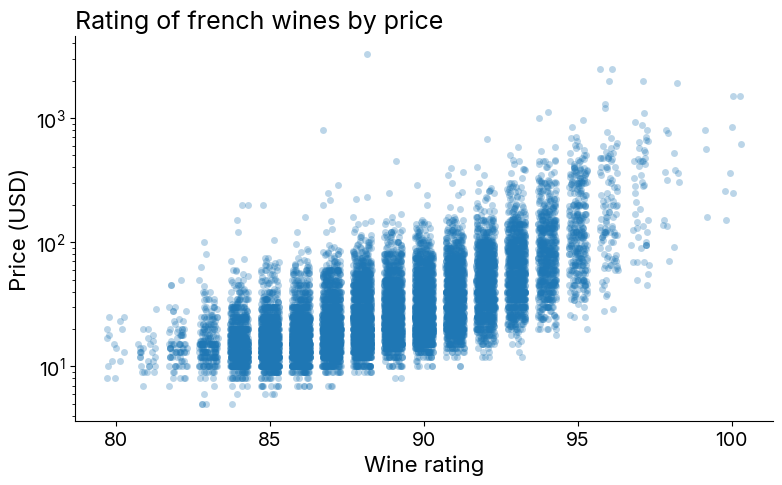

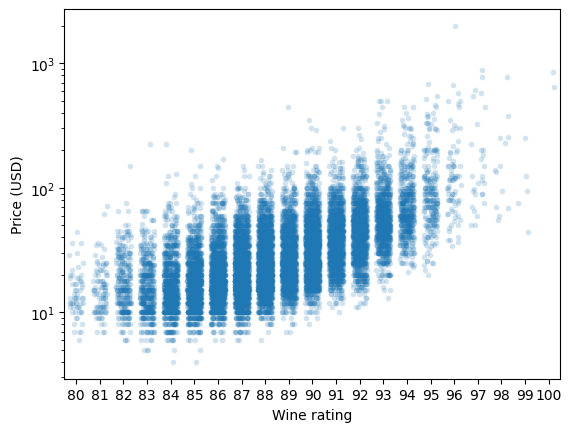

In [5]:
fig, ax = plt.subplots()

sample = df.sample(20000)
ax.set_yscale("log")
# ax.set_xticks(ticks = [80,100])
ax.set_xlabel("Wine rating")
ax.set_ylabel("Price (USD)")
ax = sns.stripplot(data = sample, x="points", y="price", alpha = 0.2, jitter = 0.3, size = 4)
plt.show()

### Задача 1.2 (0.5 балла)

Напишите код, который воспроизводит график:

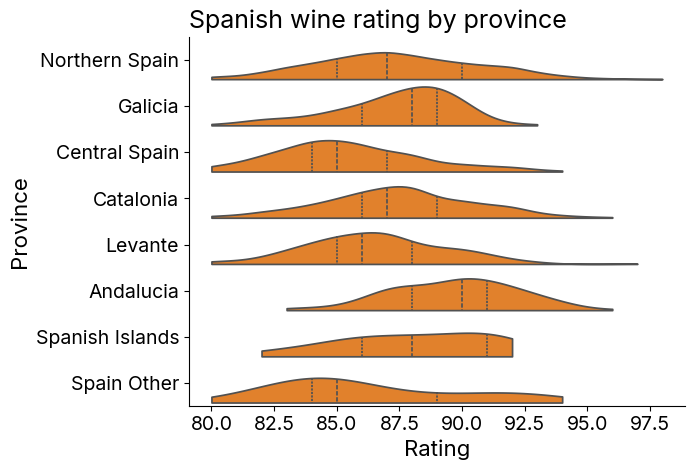

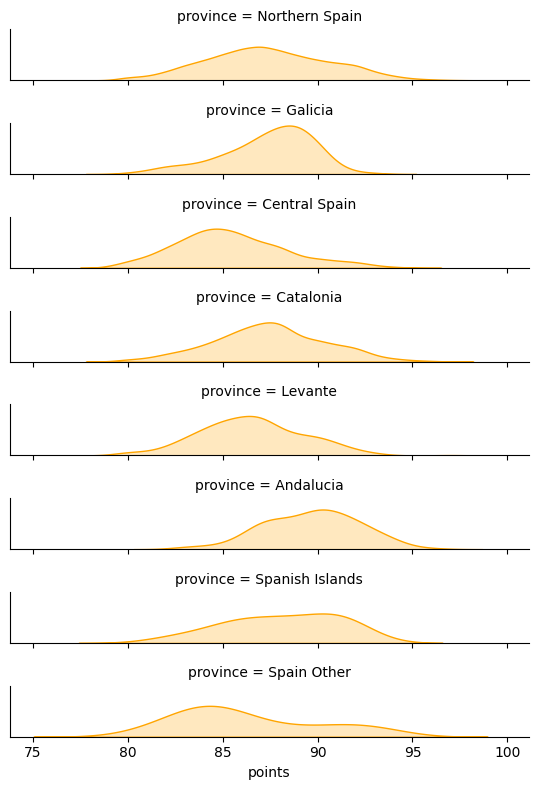

In [48]:
spanish_wines = df[df["country"] == "Spain"]
graph = sns.FacetGrid(spanish_wines, row='province', height=1, aspect=6)
graph.map(sns.kdeplot, "points", fill=True, color="Orange")
graph.set(yticks=[], ylabel="")

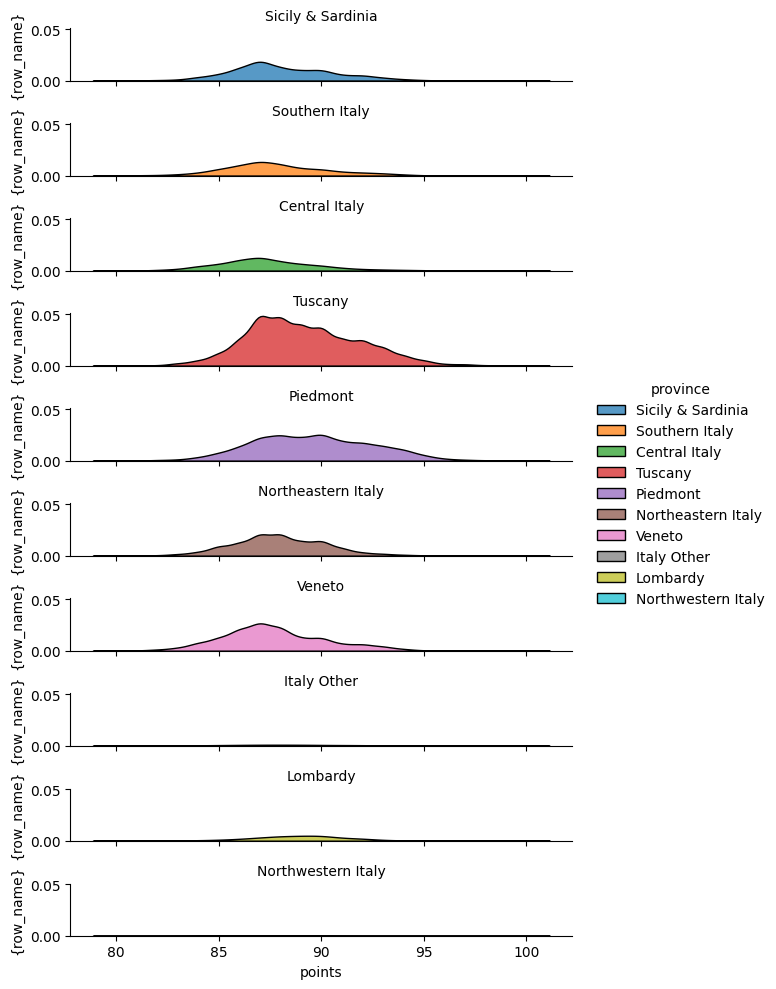

In [40]:
gr = sns.displot(df[df['country'] == "Italy"], x = "points", hue = "province", kind="kde", multiple = "stack", row = "province", height = 1, aspect = 6, common_norm = True)
gr.set_ylabels("{2")
gr.set_titles("{row_name}")

### Задача 1.3 (1 балл)

Напишите код, который воспроизводит график:

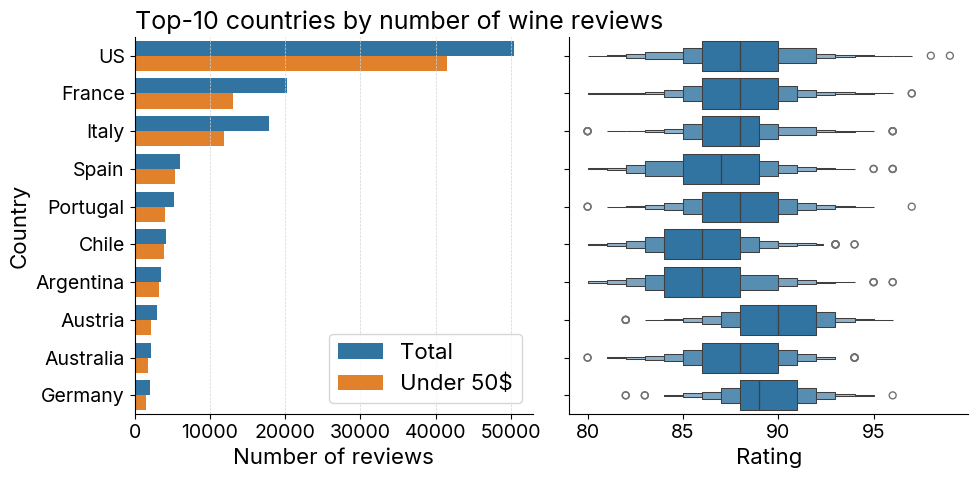

### Задача 1.4 (1.5 балла)

Напишите код, который воспроизводит график:

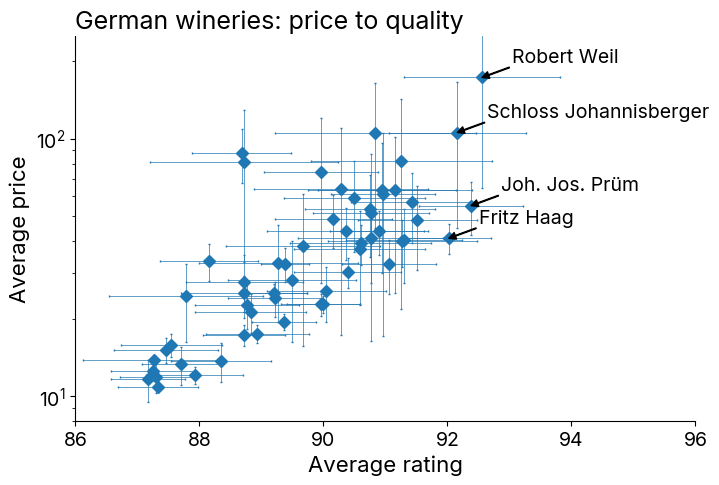

**Указание**: точки - средние, "усы" - стандартные отклонения. Взяты только винодельни с 10 или более отзывами в датасете.

### Задача 1.5 (1.5 балла)

Напишите код, который воспроизводит график:

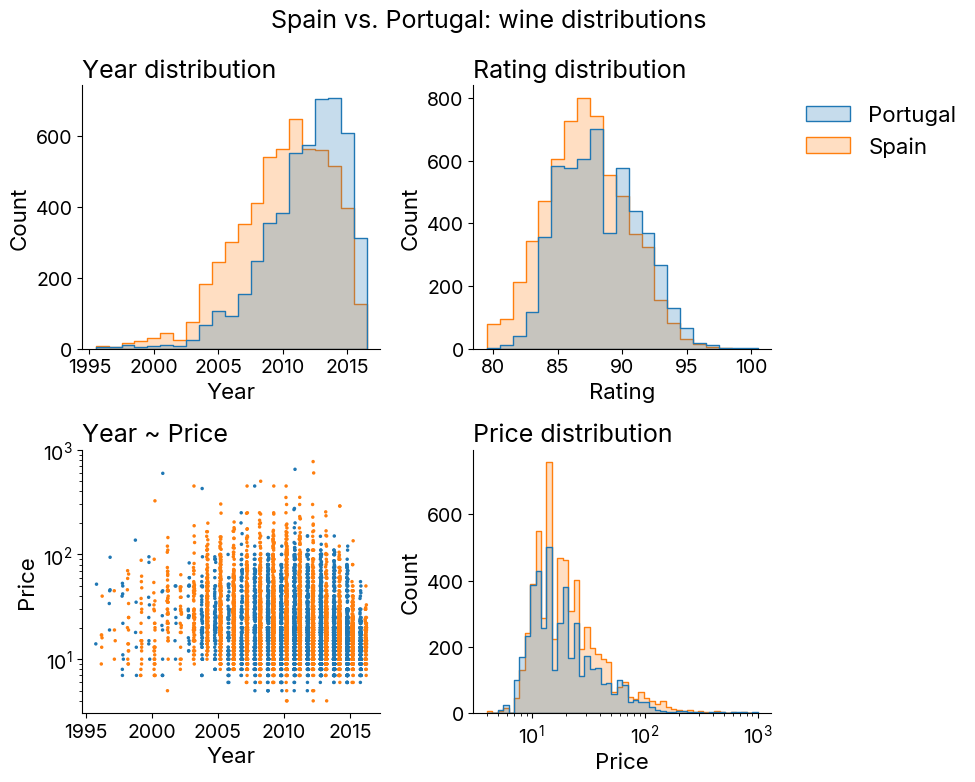

**Указание**: год получен по данным датасета с помощью средств Pandas. Годы вне диапазона [1996, 2016] считаются неизвестными.

### Задача 1.6 (1 балл)

Напишите код, который воспроизводит график:

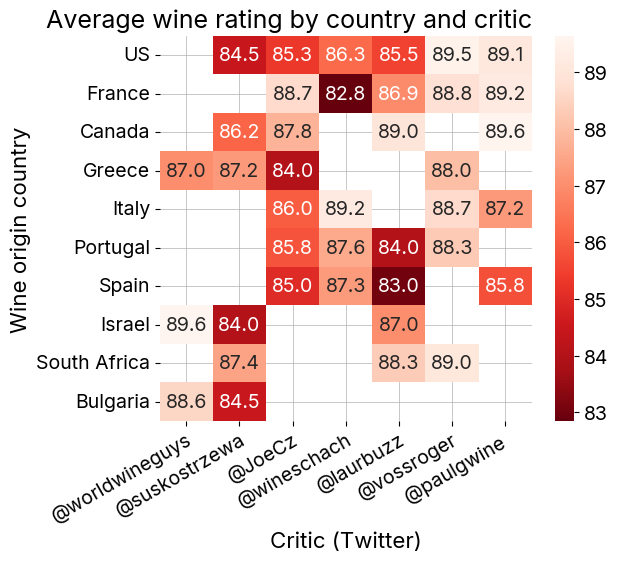

**Указание**: взяты не все страны и критики <font color='lightgray'>(были выбраны критики, которые оценивали наибольшее количество стран, а затем выбраны страны, вино из которых оценивали наибольшее число выбранных критиков, но можно просто выбрать страны и критиков так же, как на картинке)</font>

В ячейках указан средный рейтинг (`points`), выданный критиком винам из определенной страны.

## Блок 2. **Tool**: информация о колонках датафрейма (4 балла)

#### чтобы получить полный балл, нужно прикрепить ваш правильно работающий пример в отдельном окошке

### Несколько слов про tool-блоки в домашках

Классного датасаентиста помимо всего прочего отличает его "портфель" - набор готового кода на все случаи жизни,
    который он носит с собой где бы он ни работал и какую бы домашку не делал. Во время различных профессиональных занятий
    всегда хорошо сохранить функцию, которая помогла вам сейчас решить конкретную задачу себе "в папочку", чтобы столкнувшись
    с такой / похожей задачей дальше, иметь под рукой oneliner, который сделает все так, как вам хочется.
    
Время от времени в ваших домашках будут появляться tool-блоки, в которых мы будем просить вас написать что-нибудь, что вам
    пригодится в дальнейшем, а также закрепляет пройденный материал.
    Настоятельно рекомендуем завести себе хранилище, куда вы будете складывать функции из домашек,
    а также те, которые напишете сами и сочтете достойными.

В дальнейшем вы сможете импортировать ваши функции в любой проект, например, так:

```
import sys
sys.path.append('/*SOME_PATH*/my_code/my_utils')
from utils.plot import plot_denisty
```

<br/>
Скорее всего, со временем вы захотите дополнить / исправить / переделать под себя эти функции, и это правильно,
    однако в домашках нужно сделать ровно то, что написано в задании - ни больше, ни меньше. Все остальное - уже самостоятельно.
    Можно воспринимать функции из домашек как шаблоны, вдохновляющие вас на дальнейшее творчество.
    Чтобы вы в будущем могли разобраться, что происходит у вас в коде (а тем более - проверяющие), мы будем просить вас писать
    комментарии к вашему коду и докстринги (пример ниже). Это несложная и очень полезная привычка, которая не раз выручит вас.

Условия проверки tool-блоков:
- Если какая-то часть задания не реализована или вы сделали что-то запрещенное, вы получаете 0 баллов за задачу
- Если сделано все, что описано в задании и не сделано ничего запрещенного, есть docstring и комментарии к коду,
    вы получаете полный балл за задачу
- После получения полного балла, могут быть вычтены баллы за любого рода неадекватность. Размер штрафа субъективен
    и коррелирует с масштабом неадекватности - на что-то можно закрыть глаза, на что-то не получится.
- Вспомогательные принты и любые следы тестирования - неадекватность
- Неадекватностью может являться кривое выполнение пункта задания, однако если мы посчитаем пункт кривым,
    это не значит, что у вас 0 за задачу. Не сделать и сделать неправильно - разные вещи
- Некоторые советы и намеки на то, что считается адекватным для конкретной задачи, можно будет найти в задании :)

### Задача 2.1 (4 балла)

Напишите функцию `get_df_info`, которая будет выводить информацию о колонках входного датафрейма. Функция должна возвращать датафрейм следующего формата:

- индекс - все колонки входного датафрейма


- в колонках результирующего датафрейма содержится следующая информация (см. пример ниже):
    - тип данных
        - используйте `df.col.dtype.name`, это стабильнее, чем `df.col.dtype`
    - количество уникальных элементов
        - включая наны
    - доля нанов в колонке
    - доля нулей в колонке
    - доля пустых строк в колонке
    - доля самого частовстречаемого элемента в колонке + сам этот элемент (aka `vc_max`)
        - исключая наны
        - в одной колонке или в двух разных - решать вам
        - если таких несколько - можно брать любой
        
    - два разных примера содержимого колонки
        - исключая наны
        - в одной колонке или в двух разных - решать вам
        
    - `trash_score` колонки: max([суммарная доля нанов, нулей и пустых строк], [`vc_max`.доля if `vc_max`.доля > thr else 0])
        - thr нужно принимать в качестве аргумента функции, поставив по умолчанию что-то адекватное
      
      
- про адекватность
    - нужно сделать так, чтобы как можно больше выводимой вами информации было понятно глазу без доп. усилий
    - округляйте до трех знаков доли
    - выводите чистый 0 спецсимволом, чтобы не путать с округлившимся 0.00001 (напр. '' или -1)
    - если нужно, выводите числа в виде строк
    - убедитесь, что в случае когда двух примеров не набирается, вы можете отличить информацию "примера нет" от пустой строки
    - можете использовать доп. символы, чтобы отличать колонки быстрее, где нужно (напр. 'z:', 'n:', 'e:')
    - обрабатывайте любые другие возникающие неадекватные ситуации и приводите их в адекватный вид :)
    
    
- запрещено: итерироваться по строкам входного датафрейма в любом виде (по колонкам можно)

Предлагается реализовать функцию на датасете Titanic, немного измененном следующим образом:

In [ ]:
!wget https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/titanic_train.csv -O titanic_train.csv

--2025-09-29 23:40:04--  https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/titanic_train.csv
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/csv]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  59.76K   209KB/s    in 0.3s    

2025-09-29 23:40:06 (209 KB/s) - ‘titanic_train.csv’ saved [61194/61194]



In [ ]:
import pandas as pd

df = pd.read_csv('titanic_train.csv')
df['Embarked'] = df['Embarked'].replace('Q', '')
df['PassengerId'] = df['PassengerId'].astype('string')

In [ ]:
def get_df_info(df, *args, **kwargs):
    '''
    docstring example:

    Выводит инфу о колонках датафрейма в виде датафрейма

    df: исходный датафрейм
    ...

    returns: pd.DataFrame с инфой

    '''
    # your code here
    pass

In [ ]:
# ваш пример
get_df_info(df)

In [ ]:
# Это пример, не запускайте эту ячейку

# WARNING: пример не обязан соблюдать все пункты задания, но вы обязаны :)

get_df_info(df)

dtype  nunique            example_1               example_2  \
                                                                             
Cabin         object      147                 C148                     B42   
Parch          int64        7                    6                       4   
SibSp          int64        7                    8                       5   
Survived       int64        2                    1                       0   
Age          float64       88                 74.0                    34.5   
Embarked      object        3                   ''                       C   
Fare         float64      248              10.5167                  9.8458   
Ticket        object      681               370376                  111369   
Sex           object        2               female                    male   
Pclass         int64        3                    2                       1   
PassengerId   string      891                  891                     890   
Name          object      891  Dooley, Mr. Patrick  Behr, Mr. Karl Howel..   

                 zero       nan empty_str                 vc_max trash_score  
                                                                              
Cabin              -1  n: 0.771        -1             (0.02, G6)       0.771  
Parch        z: 0.761        -1        -1             (0.761, 0)       0.761  
SibSp        z: 0.682        -1        -1             (0.682, 0)       0.682  
Survived     z: 0.616        -1        -1             (0.616, 0)       0.616  
Age                -1  n: 0.199        -1          (0.042, 24.0)       0.199  
Embarked           -1  n: 0.002  e: 0.086             (0.724, S)       0.089  
Fare         z: 0.017        -1        -1          (0.048, 8.05)       0.017  
Ticket             -1        -1        -1        (0.008, 347082)          -1  
Sex                -1        -1        -1          (0.648, male)          -1  
Pclass             -1        -1        -1             (0.551, 3)          -1  
PassengerId        -1        -1        -1             (0.001, 1)          -1  
Name               -1        -1        -1  (0.001, Braund, Mr..)          -1

***Вопрос:*** Как вы думаете, какие проблемы с этой функцией могут возникнуть при применении ее на других датасетах?

<Введите ответ тут>